In [2]:
import yfinance as yf

# Define the ticker symbol for Tesla
tickerSymbol = 'TSLA'

# Get data on this ticker
tesla_data = yf.Ticker(tickerSymbol).history(period='1d', start='2022-1-1', end='2024-4-20')

# Reset the index of the tesla_data dataframe
tesla_data.reset_index(inplace=True)

# Save the updated dataframe to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

# Display the first five rows of the dataframe
print(tesla_data.head())

                       Date        Open        High         Low       Close  \
0 2022-01-03 00:00:00-05:00  382.583344  400.356659  378.679993  399.926666   
1 2022-01-04 00:00:00-05:00  396.516663  402.666656  374.350006  383.196655   
2 2022-01-05 00:00:00-05:00  382.216675  390.113342  360.336670  362.706665   
3 2022-01-06 00:00:00-05:00  359.000000  362.666656  340.166656  354.899994   
4 2022-01-07 00:00:00-05:00  360.123322  360.309998  336.666656  342.320007   

      Volume  Dividends  Stock Splits  
0  103931400        0.0           0.0  
1  100248300        0.0           0.0  
2   80119800        0.0           0.0  
3   90336600        0.0           0.0  
4   84164700        0.0           0.0  


In [5]:
pip install requests

In [6]:
pip install beautifulsoup4

In [7]:
pip install pandas

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,'html5lib')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("table", {"class": "historical_data_table"}).find_all("tr"):
    col = row.find_all("td")
    if len(col) > 1:
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.head()
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

AttributeError: 'NoneType' object has no attribute 'find_all'

In [21]:
import yfinance as yf

# Extract stock data for GameStop (GME)
gme_data = yf.download('GME', start='2022-01-03', end='2022-01-07')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the data to a CSV file
gme_data.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows
print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000


In [16]:
pip install yfinance

In [17]:
pip install matplotlib

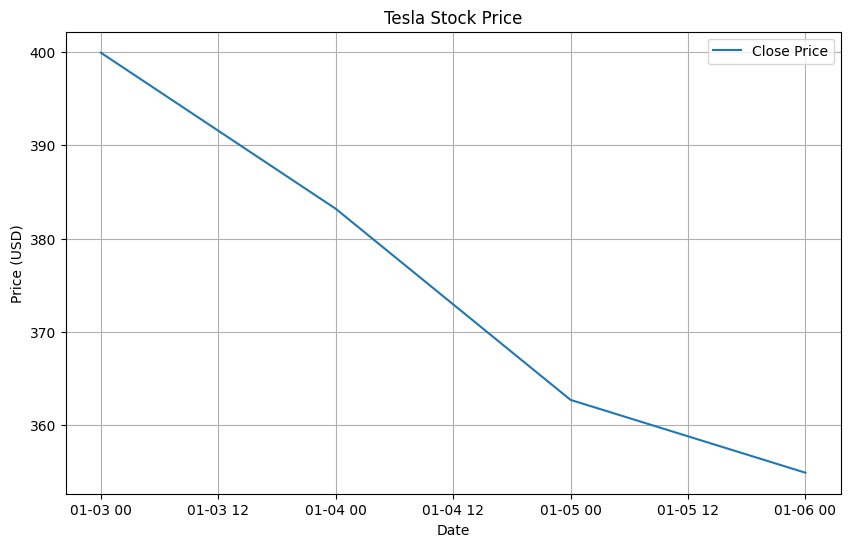

In [23]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the data with a title
make_graph(tesla_data, title='Tesla Stock Price')


[*********************100%%**********************]  1 of 1 completed


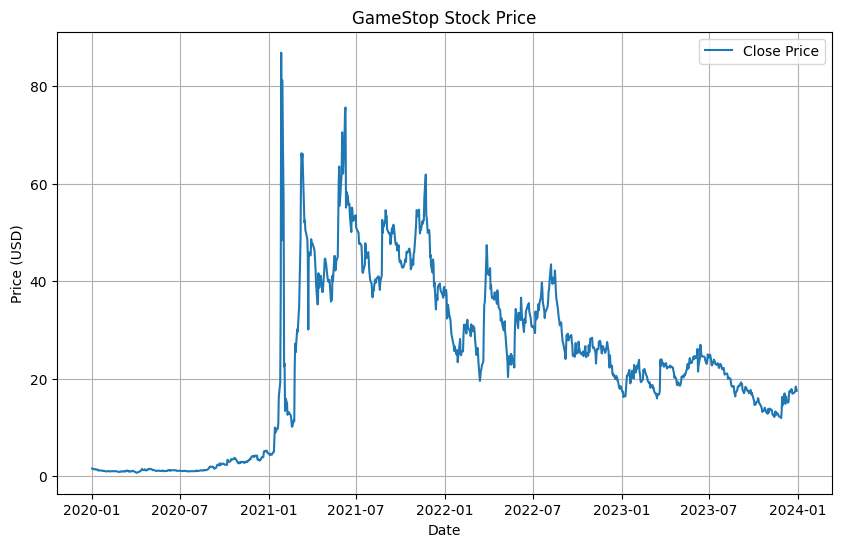

In [24]:
import yfinance as yf

# Define the make_graph function
def make_graph(data, title):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract stock data for GameStop (GME)
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

# Plot the data with a title
make_graph(gme_data, title='GameStop Stock Price')



In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website containing Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
table = soup.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if table:
    # Extract table headers
    headers_row = table.find('tr')
    if headers_row:
        headers = [th.text.strip() for th in headers_row.find_all('th')]

        # Extract table rows
        rows = []
        for row in table.find_all('tr')[1:]:
            rows.append([td.text.strip() for td in row.find_all('td')])

        # Create a DataFrame
        tesla_revenue = pd.DataFrame(rows, columns=headers)

        # Display the last five rows
        print(tesla_revenue.tail())
    else:
        print("Table headers not found.")
else:
    print("Table not found on the webpage.")


Table not found on the webpage.


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

# Extract the table with GameStop Quarterly Revenue
gme_revenue = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]

# Rename columns and remove comma and dollar sign from Revenue column
gme_revenue = gme_revenue.rename(columns={"GameStop Quarterly Revenue(Millions of US $)":"Date","GameStop Quarterly Revenue(Millions of US $).1":"Revenue"})
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display the last five rows of the gme_revenue dataframe using the tail function
gme_revenue.tail()

HTTPError: HTTP Error 403: Forbidden